In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
# Load Yelp business data
review = pd.read_json('/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_review.json', lines=True, chunksize=20000)

In [6]:
review=next(review)

In [7]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [8]:
output_csv_path = '/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_review.csv'
review.to_csv(output_csv_path, index=False)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns




In [1]:
# Loading the dataset
file_path = '/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_review.csv'
df = pd.read_csv(file_path)


NameError: name 'pd' is not defined

In [17]:
# Mapping star ratings to three classes: 1-2 stars as "Negative" (0), 3 stars as "Neutral" (1), and 4-5 stars as "Positive" (2)
df['label'] = df['stars'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))

In [18]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2


In [19]:


# Extract features (text reviews) and labels
X = df['text']
y = df['label']


In [20]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Use CountVectorizer to create One-Hot vectors with Unigram+Bigram
vectorizer = CountVectorizer(ngram_range=(1, 2), binary=True)
X_train_onehot = vectorizer.fit_transform(X_train)
X_test_onehot = vectorizer.transform(X_test)


In [30]:
X_train_onehot.shape

(16000, 457401)

In [31]:

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_onehot, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [32]:

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_onehot)
y_proba = svm_classifier.decision_function(X_test_onehot)


In [33]:

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.84


In [34]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


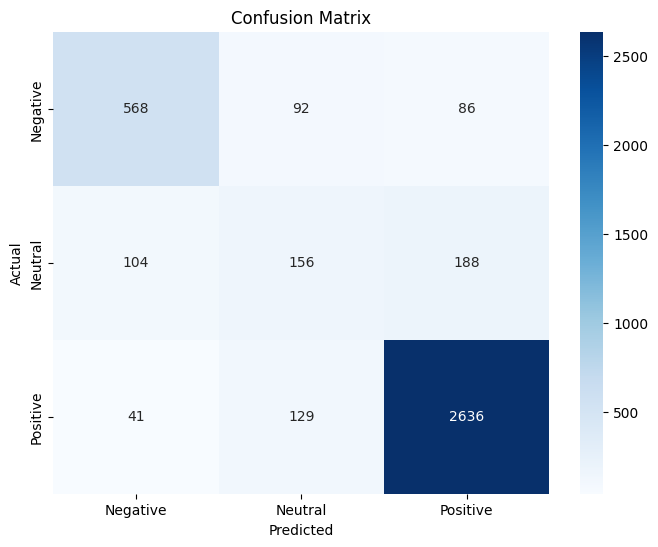

In [35]:

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:

# Compute F1 scores for positive and negative classes
f1_negative = f1_score(y_test, y_pred, labels=[0], average='weighted')
f1_positive = f1_score(y_test, y_pred, labels=[2], average='weighted')


In [37]:

print(f"F1 Score (Negative): {f1_negative:.2f}")
print(f"F1 Score (Positive): {f1_positive:.2f}")


F1 Score (Negative): 0.78
F1 Score (Positive): 0.92


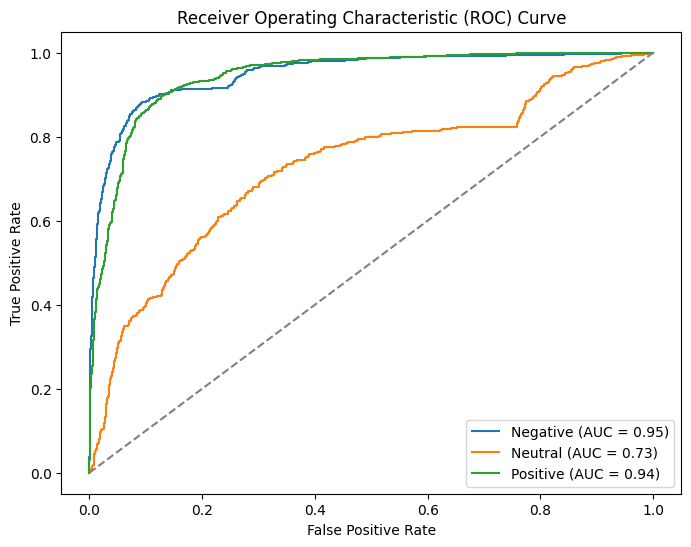

In [38]:
# Compute and plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_test == i, y_proba[:, i]):.2f})')



plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
# Compute ROC and AUC for Negative class
fpr_negative, tpr_negative, _ = roc_curve(y_test == 0, y_proba[:, 0])
auc_negative = roc_auc_score(y_test == 0, y_proba[:, 0])
print(f"Negative Class AUC: {auc_negative:.2f}")

# Compute ROC and AUC for Positive class
fpr_positive, tpr_positive, _ = roc_curve(y_test == 2, y_proba[:, 2])
auc_positive = roc_auc_score(y_test == 2, y_proba[:, 2])
print(f"Positive Class AUC: {auc_positive:.2f}")

Negative Class AUC: 0.95
Positive Class AUC: 0.94
